In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import time, sys

#### Esercizi svolti da Stefano Polo

#### Matricola: 940175

#### Informazione sulla cartella contenente codici e risultati:
La struttura della cartella così come è presentata è funzionale per una compilazione semplice del *notebook*. Infatti tutti i risultati della simulazione sono disposti nella cartella <span style="color:red"> Risultati </span>. Di conseguenza al fine della compilazione del *notebook* non è necessario rieseguire la simulazione. Nella cartella <span style="color:red">Codice</span> è presentato il codice C++ per lo svolgimento dell'esercizio. La compilazione e l'esecuzione di quest'ultimp prevede l'automatica sovrascrittura dei file contenenti i risultati su quelli vecchi contenuti nella cartella <span style="color:red"> Risultati</span> (dunque un'esecuzione dei codici non richiede che i nuovi risultati vengano copiati a mano in <span style="color:red"> Risultati</span>).

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


### Exercise 05.1




#### Introduzione all'esercizio
Lo scopo di questo esercizio è quello di campionare con l'algoritmo Metropolis le densità di probablità $|\Psi_{1,0,0}(x,y,z)|^2$ e $|\Psi_{2,1,0}(x,y,z)|^2$.

$\Psi_{1,0,0}(x,y,z)$ e $\Psi_{2,1,0}(x,y,z)$ rappresentano le funzioni d'onda rispettivamente di ground state e di un orbitale $2p$ dell'atomo di idrogeno definite dalle seguenti espressioni:

$$\Psi_{1,0,0}(x,y,x)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-(x^2+y^2+z^2)^{1/2}/a_0}  \, ,
$$

$$\Psi_{2,1,0}(x,y,z)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} z e^{-(x^2+y^2+z^2)^{1/2}/2a_0}  \, ,$$

dove $a_0 =  0.0529 \, \text{nm}$ è il raggio di Bohr.

Con i punti campionati dal Metropolis è richiesto di calcolare i raggi medi corrispondenti alle due funzioni d'onda:
$$\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

#### Descrizione dello svolgimento

Per la risoluzione dell'esercizio ho implementato nel codice l'algoritmo di Metropolis (file <span style="color:red">Metropolis.cpp</span> e <span style="color:red">Metropolis.h</span>) in moodo che fosse in grado di campionare una generica densità di probabilità multidimensionale per un numero di passi fissato. Inoltre l'algoritmo presenta la possibilità di calcolare l'*acceptance ratio* a fine simulazione e possiede un metodo di equilibrazione per un certo numero di passi data una posizione iniziale da cui partire.

In questo esercizio, date le distribuzioni di probabilità sopra esposte, ho campionato le posizioni $\vec{x} = (x,y,z)$ nello spazio tridimensionale per un numero di passi dell'algoritmo di Metropolis fissato a $M = 10^6$. Prima dell'esecuzione di ciascuna simulazione, ho predisposto una fase di equilibrazione del programma per un numero di passi pari a $10^3$. Sia per l'orbitale $1s$ sia per il $2s$ sono state eseguite due simulazioni con differenti probabilità di transizione $T(\vec{x}|\vec{y})$:

- distribuzione uniforme;
- distribuzione gaussiana;

Per ottenre probabilità di accettazione della mossa proposta di $\sim 50\%$ sono stati scelti i segueti parametri di posizione iniziale $\vec{x_0}$ e di passo $a$ in unità del raggio di Bohr $a_0$:

 |$1s$ con passo uniforme |$1s$ con passo gaussiano | $2p$ con passo uniforme | $2p$ con passo gaussiano
--|---|-----|------------|----
$\vec{x_0} $|(1,1,1) |posizione finale di quella uniforme|(2,3,2)| posizione finale di quella uniforme
$a$|1.2|0.75|2.8|1.85

Da ogni posizione $\vec{x}$ è stato ricavato il raggio, cioè la distanza dall'origine, $r= || \vec{x} || = \sqrt{ x^2 + y^2 + z^2}$ sia per il passo uniforme che per quello guassiano. 

#### Risultati
Una volta calcolata la distanza dall'origine per ciascun punto campionato, ho adottato il metodo del *data blocking* con un numero di blocchi $N_{block} = 100$. Nella cella sottostante sono riportati i grafici dei valori medi di $r$ in funzione di $N_{block}$ con il corrispondente errore sia per il caso uniforme sia per quello gaussiano. Si osserva come, nonostante i due casi differiscano per la $T(\vec{x}|\vec{y})$, i risultati di $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ siano compatibili entro gli errori stimati con i valori esatti.

Si può notare inoltre che il passo utilizzato per campionare gli orbitali è dell'ordine del raggio di Bohr in un passo si può attraversare l'intero orbitale e dunque le configurazioni $\vec{x}$ sono, in ottima approssimazione, non correlate tra loro e quindi si possono utlizzare anche solo pochi punti per blocco per avere blocchi indipendenti e quindi poter applicare il teorema del limite centrale.



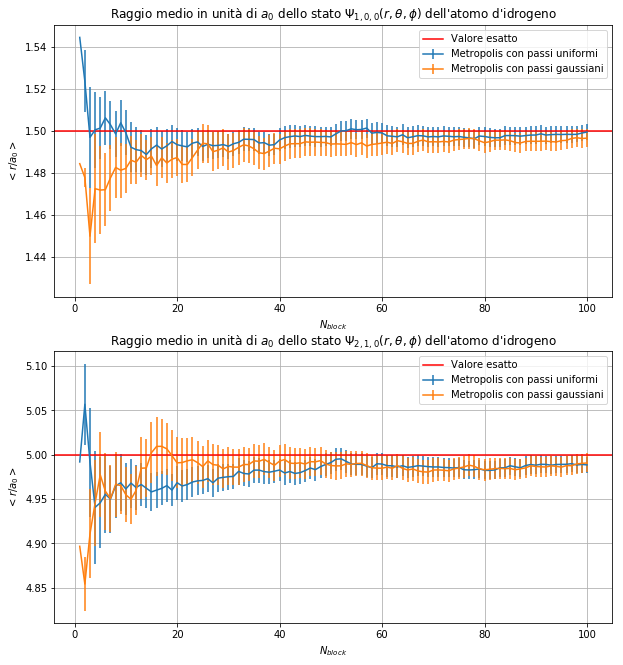

In [34]:
plt.figure(figsize=(10,11))

plt.subplot(2,1,1)
N, r, error = np.loadtxt('Risultati/Raggi_s.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.title(r"Raggio medio in unità di $a_0$ dello stato $\Psi_{1,0,0}(r,\theta,\phi)$ dell'atomo d'idrogeno")
plt.axhline(y=3./2,linestyle='-',color = 'red',label = 'Valore esatto')
plt.errorbar(N,r,yerr=error, label = 'Metropolis con passi uniformi')
N, r, error = np.loadtxt('Risultati/Raggi_s_gauss.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N,r,yerr=error, label = 'Metropolis con passi gaussiani')
plt.xlabel('$N_{block}$')
plt.ylabel(r'$<r/a_0>$')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
N, r, error = np.loadtxt('Risultati/Raggi_p.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.title(r"Raggio medio in unità di $a_0$ dello stato $\Psi_{2,1,0}(r,\theta,\phi)$ dell'atomo d'idrogeno")
plt.axhline(y=5,linestyle='-',color = 'red',label = 'Valore esatto')
plt.errorbar(N,r,yerr=error, label = 'Metropolis con passi uniformi')
N, r, error = np.loadtxt('Risultati/Raggi_p_gauss.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N,r,yerr=error, label = 'Metropolis con passi gaussiani')
plt.xlabel('$N_{block}$')
plt.ylabel(r'$<r/a_0>$')
plt.legend()
plt.grid(True)

#### Punti campionati
Nella cella sottostante mostro gli *scatter plot* dei punti $\vec{x}$ campionati per l'orbitale $1s$ e $2p$ nel caso di $T(\vec{x}|\vec{y})$ uniforme (il caso gaussiano è estremamente simile). Si osserva come il campionamento del Metropolis metta in luce la struttura sferica dell'orbitale $1s$ e quella a due lobi del $2p$.

<span style="color:red"> ATTENZIONE: la compilazione della cella sottostante richiede qualche minuto ($\sim1-2 \, \text{min}$) </span>

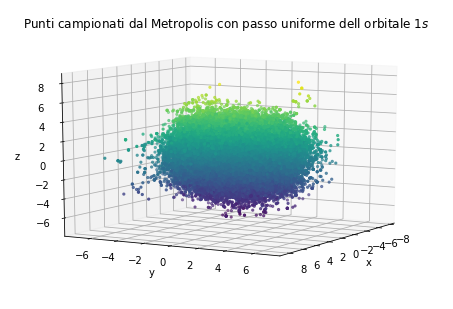

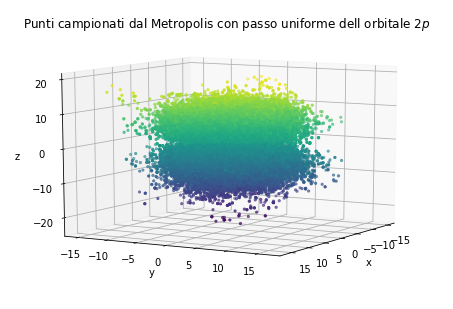

Tempo di esecuzione cella: ---2.1372010032335917 minuti ---


In [3]:
start_time = time.time()
X,Y,Z= np.loadtxt('Risultati/Risultati_S.out', usecols=(0,1,2), delimiter=' ', unpack='true')
X2,Y2,Z2= np.loadtxt('Risultati/Risultati_P.out', usecols=(0,1,2), delimiter=' ', unpack='true')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Punti campionati dal Metropolis con passo uniforme dell orbitale $1s$')
ax.view_init(10, 30)
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Punti campionati dal Metropolis con passo uniforme dell orbitale $2p$')
ax.view_init(10, 30)
plt.show()
print("Tempo di esecuzione cella: ---%s minuti ---" %((time.time()-start_time)/60))